# Falling Coins - A Study
#### By Brent Mercado

Throughout the semester, we continously asked the same quesition: *what happens if a penny is dropped off of the Empire State Building?*

<img src="https://media.istockphoto.com/id/157423207/photo/change-falling-from-sky-heaven-pennies-dimes-quarters-nickles.jpg?s=612x612&w=0&k=20&c=DBrYC6SAAg1Sd8MX0_2_UMK9OTiH2bIFZ_ehDi-VKzw=" width=400 height=250 /> 

In this cumulative project, not only will we answer the question of the penny falling, but significantly  study the behavior of a free falling object under different conditions. We will utilize various kinematic based equations to model a free falling object - a penny and a quarter! 
**The position of a falling object at an instantaneous moment is represented by:**
$$ 
\frac{dy}{dt} = \ v
$$

Where dy represents position and dt represents time, position over time is velocity. **The velocity of a falling object at an instantaneous moment is represented by:**
$$ 
\frac{dv}{dt} = \ -g + a_d
$$

Where dv represents velocity and dt represents time, velocity over time is the sum of accelerations with respect to direction. In this case, acceleration due to gravity, g, acts in the negative direction and a<sub>drag</sub>, acts in the positive direction.

Using these simulations, we will visually represent both a simulation and analysis model for different scenarios. Lets start!

In [1]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [3]:
import math
import numpy as np

 ## Initializing Parameters
 To demonstrate this model, we will use a `Params` object from the modsim library, that we will later use to create a `System` object. We will store all of our relevant data to refer to for our model implementation and execution. 

**Scenario 1**: Quarter dropped from the [Empire State Buidling, 381m in height](https://thetowerinfo.com/buildings-list/empire-state-building/)

(note: the mass of a quarter is approximately [0.0055 kg](https://www.webpages.uidaho.edu/dl2/on_target/mass_of_quarter.htm) and diameter [0.0243 m](https://www.usmint.gov/coins/coin-medal-programs/circulating-coins/quarter))

In [4]:
params_quarter_high = Params(height = 381,     # m
                v_init = 0,       # m / s
                g = 9.8,          # m/s**2
                mass = 5.5e-3,    # kg
                diameter = 24.3e-3, # m
                rho = 1.225,        # kg/m**2
                t_end = 30,      # seconds 
                C_d = 1.12
               )

show(params_quarter_high)

,value
height,381.0000
v_init,0.0000
g,9.8000
mass,0.0055
diameter,0.0243
rho,1.2250
t_end,30.0000
C_d,1.1200


Above, we observe 3 variables: *rho*, *C<sub>d*, and *g*
    
***rho*** (ρ) is the density of the atmosphere that the object is falling through. In this case, 1.225 represents the outside air.
    
***C<sub>d*** is the coefficient of drag, the [friction constant](https://www.britannica.com/science/coefficient-of-friction#:~:text=coefficient%20of%20friction%2C%20ratio%20of,N%20is%20the%20normal%20force.) of air
    
***g*** is the acceleration due to gravity on earth, 9.81 m/s<sup>2</sup>

**Scenario 2**: Quarter dropped from the [Dreyfuss Building, 5m in height](https://www.fdu.edu/campuses/florham-campus/maps-directions/)

In [5]:
params_quarter_low = Params(height = 5,     # m
                v_init = 0,       # m / s
                g = 9.8,          # m/s**2
                mass = 5.5e-3,    # kg
                diameter = 24.3e-3, # m
                rho = 1.225,        # kg/m**2
                t_end = 30,      # seconds 
                C_d = 1.12
               )

show(params_quarter_low)

,value
height,5.0000
v_init,0.0000
g,9.8000
mass,0.0055
diameter,0.0243
rho,1.2250
t_end,30.0000
C_d,1.1200


**Scenario 3**: Penny dropped from the Empire State Buidling, 381m in height

(note: the mass of a penny is approximately [0.0025 kg](https://www.usmint.gov/coins/coin-medal-programs/circulating-coins/penny) and diameter [0.019 m](https://www.usmint.gov/coins/coin-medal-programs/circulating-coins/penny))

In [6]:
params_penny_high = Params(height = 381,     # m
                v_init = 0,       # m / s
                g = 9.8,          # m/s**2
                mass = 2.5e-3,    # kg
                diameter = 19e-3, # m
                rho = 1.2,        # kg/m**3
                t_end = 30,      # seconds 
                C_d = 1.12,
               )
show(params_penny_high)

,value
height,381.0000
v_init,0.0000
g,9.8000
mass,0.0025
diameter,0.0190
rho,1.2000
t_end,30.0000
C_d,1.1200


**Scenario 4**: Penny dropped from the Dreyfuss Buidling, 5m in height

In [7]:
params_penny_low = Params(height = 5,     # m
                v_init = 0,       # m / s
                g = 9.8,          # m/s**2
                mass = 2.5e-3,    # kg
                diameter = 19e-3, # m
                rho = 1.2,        # kg/m**3
                t_end = 30,      # seconds 
                C_d = 1.12,
               )
show(params_penny_low)

,value
height,5.0000
v_init,0.0000
g,9.8000
mass,0.0025
diameter,0.0190
rho,1.2000
t_end,30.0000
C_d,1.1200


# Defining Functions

### Initializaton Functons

In [8]:
def cal_area(diameter):
    '''
    Helper function that calculates area of coin object given diameter
    
    diameter = float
    
    returns: value of area
    '''
    radius = diameter/2
    return (radius**2)*np.pi

In [9]:
def cal_term_vel(mass, g, C_d, rho, area):
    '''
    Calculates terminal velocity of system
    
    mass = float
    g = float
    C_d = float
    rho = float
    area = float
    
    returns: value of terminal velocity
    '''
    term_vel = math.sqrt((2*mass*g)/(C_d*rho*area))
    return term_vel

In [10]:
def make_system(params):
    '''
    Makes a System object for the given conditions.
    
    params = Params object
    
    returns: System object
    '''
    area = cal_area(params.diameter)
    
    v_term = cal_term_vel(params.mass, params.g, params.C_d, params.rho, area)
    
    diameter, mass = params.diameter, params.mass
    g, rho = params.g, params.rho, 
    
    v_init, C_d = params.v_init, params.C_d
    
    
    height = params.height
    init = State(y=height, v=v_init)
    t_0 = 0
    t_end = 35
    dt = 0.1
    
    return System(params, area=area, C_d=C_d, 
                  init=init, t_0=t_0,t_end=t_end, dt=dt, v_term = v_term)

### Simulation Functions

In [11]:
def update_func(state, t, system):
    '''
    Updates the model, utilized for a simulation.
    
    state = position, velocity
    t = time
    system = System object containing `g`
    
    returns = State object containing position and velocity
    '''
    y, v = state
    g = system.g
    dt = system.dt
    f_drag = system.rho * v**2 * system.C_d * system.area / 2
    a_drag = f_drag / system.mass

    y_new = y + v*dt
    v_new = v - system.g*dt + a_drag*dt

    return State(y=y_new, v=v_new)

In [12]:
def run_simulation(system, update_func):
    '''
    Runs the simulation for the model
    
    system = system object of model
    update_func = update function of model
    
    returns = TimeFrame object
    '''
    t_array = linrange(system.t_0, system.t_end, system.dt)
    n = len(t_array)
    
    frame = TimeFrame(index=t_array, 
                      columns=system.init.index)
    frame.iloc[0] = system.init
    
    for i in range(n-1):
        t = t_array[i]
        state = frame.iloc[i]
        if state.y <= 0:
            break 
        frame.iloc[i+1] = update_func(state, t, system)
        
    
    return frame

We add the condition `if state.y <= 0` to `break` to stop the simulation when the object hits the ground.  Since calculations happen step by step, we can't precisely stop at 0 but regardless we massively declutter the future plots from impossible data given our scenario

### Analysis Functions

The main difference between an analysis model and a simulation model is characterized by *solving* the mathematical constructs that we use to build the simulation model. `slope_func` will directly express the two respective equations for position and time. Using the SimPy library's [ODE](https://en.wikipedia.org/wiki/Ordinary_differential_equation) solver, we can create this model:

In [13]:
def slope_func(t, state, system):
    '''
    Computes the derivatives of the state.
    
    state = position, velocity
    t = time
    system = System object
    
    returns = derivatives of y and v
    '''
    y, v = state
    rho, C_d, g = system.rho, system.C_d, system.g
    area, mass = system.area, system.mass
    
    f_drag = rho * v**2 * C_d * area / 2
    a_drag = f_drag / mass
    
    dydt = v
    dvdt = -g + a_drag
    
    return dydt, dvdt

In [14]:
def event_func(t, state, system):
    '''
    Return the height of the penny above the sidewalk. Used to create a termination event in the ODE solver
    
    t = int
    state = state object
    system = System object
    
    returns = position (y)
    
    '''
    y, v = state
    return y

### Plotting Functions

In [15]:
def plot_position(results1, results2, title):
    '''
    Plots 2 position resultant data
    
    results1 = TimeFrame object, penny
    
    results2 = TimeFrame object, quarter
    
    '''
    results1.y.plot(label = 'Penny Height')
    results2.y.plot(label = 'Quarter Height')
    decorate(xlabel='Time (s)',
             ylabel='Position (m)', title = title)
    plt.grid()

`plt.grid()` is a matplotlib function that adds a grid to the plot when created

In [16]:
def plot_velocity(results1, results2, title):
    '''
    Plots 2 velocity resultant data
    
    results1 = TimeFrame object, penny
    
    results2 = TimeFrame object, quarter
    
    '''
    results1.v.plot(label='Penny Velocity')
    results2.v.plot(label = 'Quarter Velocity')
    decorate(xlabel='Time (s)', ylabel='Velocity (m/s)', title= title)
    plt.grid()

## Running the Model
We are now ready to run our model given our scenarios. let's create the `System` objects for our respective scenarios:

In [17]:
quarter_high_sys = make_system(params_quarter_high)
quarter_low_sys = make_system(params_quarter_low)
penny_high_sys = make_system(params_penny_high)
penny_low_sys = make_system(params_penny_low)

namespace(height=5,
          v_init=0,
          g=9.8,
          mass=0.0025,
          diameter=0.019,
          rho=1.2,
          t_end=35,
          C_d=1.12,
          area=0.0002835287369864788,
          init=y    5
               v    0
               Name: state, dtype: int64,
          t_0=0,
          dt=0.1,
          v_term=11.339655582952656)

Now, lets run the simulations:

In [18]:
results_quarter_high_sim = run_simulation(quarter_high_sys,update_func)
results_penny_high_sim =  run_simulation(penny_high_sys,update_func)
results_quarter_low_sim = run_simulation(quarter_low_sys,update_func)
results_penny_low_sim = run_simulation(penny_low_sys,update_func)

,y,v
0.0,5.000000,0.000000
0.1,5.000000,-0.980000
0.2,4.902000,-1.952681
0.3,4.706732,-2.903621
0.4,4.416370,-3.819366
...,...,...
34.6,NaN,NaN
34.7,NaN,NaN
34.8,NaN,NaN
34.9,NaN,NaN


And now for the analysis model:

In [19]:
results_quarter_high_ode, details = run_solve_ivp(quarter_high_sys, slope_func, events=event_func)
details
results_penny_high_ode, details = run_solve_ivp(penny_high_sys, slope_func, events=event_func)
details
results_quarter_low_ode, details = run_solve_ivp(quarter_low_sys, slope_func, events=event_func)
details
results_penny_low_ode, details = run_solve_ivp(penny_low_sys, slope_func, events=event_func)
details

  message: 'A termination event occurred.'
     nfev: 32
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fd3c8b21e20>
   status: 1
  success: True
 t_events: [array([1.07551082])]
 y_events: [array([[-3.55271368e-15, -8.28386983e+00]])]

The 'termination event' exectues when y position is at 0, which eliminates irrelevant and impossible values for our experiment. 

## Plotting and Findings

Text(0, 100, 'Penny at sidewalk')

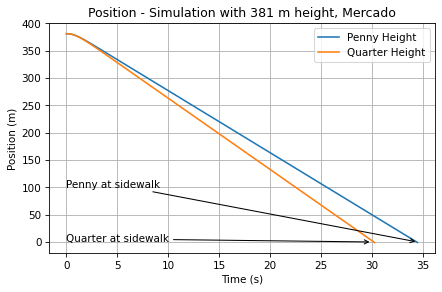

In [20]:
#Position - Simulation with 381 m height

plot_position(results_penny_high_sim, results_quarter_high_sim, 'Position - Simulation with 381 m height, Mercado')
plt.annotate('Quarter at sidewalk', xy=(30, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
plt.annotate('Penny at sidewalk', xy=(34.5, 0), xytext=(0, 100), arrowprops=dict(arrowstyle="->"))

Above, we see that the Quarter hits the ground a couple of seconds before the quarter does. This observation is consitant with [Newtons Second Law](https://www.khanacademy.org/science/hs-physics/x215e29cb31244fa1:forces-and-motion/x215e29cb31244fa1:force-mass-and-acceleration/v/newton-s-second-law-of-motion#:~:text=Newton%27s%20second%20law%20of%20motion%20states%20that%20F%20%3D%20ma%2C%20or,require%20more%20force%20to%20accelerate.) and the [Work Energy Theorem](https://www.khanacademy.org/science/in-in-class11th-physics/in-in-class11th-physics-work-energy-and-power/in-in-class11-work-energy-theorem/a/work-energy-theorem-ap1#:~:text=Sometimes%20people%20forget%20that%20the,change%20in%20its%20kinetic%20energy.), as the mass of the quarter is larger, increasing it's force falling and subsiquently the amount of energy it's producing, linked to vector of velocity by the [Conservation of Energy](https://www.khanacademy.org/science/physics/work-and-energy/work-and-energy-tutorial/a/what-is-conservation-of-energy). Now let's compare our simulation with our analysis model:

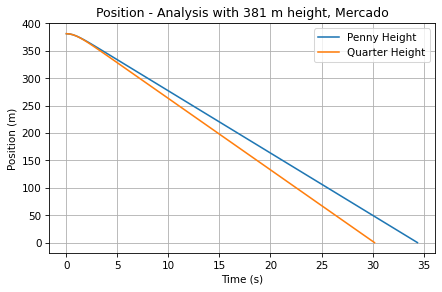

In [21]:
#Position - ODE with 381 m height

plot_position(results_penny_high_ode, results_quarter_high_ode, 'Position - Analysis with 381 m height, Mercado')

Looks identical to our simulation! Not surpising at all because both of our models are based on the same equation! Let's run a percent error test for the position of the penny to judge the accuracy each model has on eachother:

In [22]:
def percent_error(res1, res2):
    '''
    helper function that calculates percent error of two numbers
    
    res1 = float
    res2 = float
    
    returns = float
    '''
    
    greater = max(res1,res2)
    smaller = min(res1,res2)
    return ((greater-smaller)/smaller)*100
    

In [23]:
results_penny_high_ode.y

0.000000     3.810000e+02
0.344005     3.804262e+02
0.688009     3.788056e+02
1.032014     3.763560e+02
1.376019     3.733311e+02
                 ...     
33.024446    1.560081e+01
33.368451    1.170331e+01
33.712455    7.805215e+00
34.056460    3.904093e+00
34.400465   -3.197442e-14
Name: y, Length: 101, dtype: float64

Due to the approximation of linrange, we must choose one of the above time values to compare to in our simulation. Even then, `dt` in the simulation only accounted for 0.1 steps in time, so we must round our value *34.056460* up. 

note: we omit the last value as it is negative therefore unrepresentative to the experiment

In [24]:
results_penny_high_sim.y[34.1]

3.641787213707986

In [25]:
sim=3.641787213707986
ode=3.904093e+00

print(percent_error(sim,ode),'%')

7.202666462902436 %


A low percentage as we predicted! Now, let's plot the Velocities:

Text(7, -5, 'Reaches Terminal Velocity')

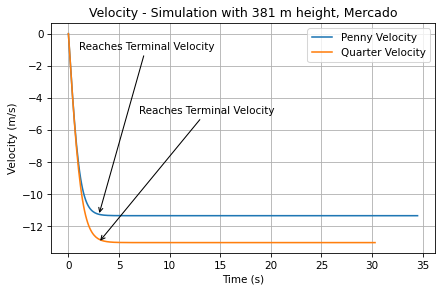

In [26]:
#Velocity - Simulation with 381 m height

plot_velocity(results_penny_high_sim, results_quarter_high_sim, 'Velocity - Simulation with 381 m height, Mercado')
plt.annotate('Reaches Terminal Velocity', xy=(3, -11.3), xytext=(1, -1), arrowprops=dict(arrowstyle="->"))
plt.annotate('Reaches Terminal Velocity', xy=(3, -13), xytext=(7, -5), arrowprops=dict(arrowstyle="->"))

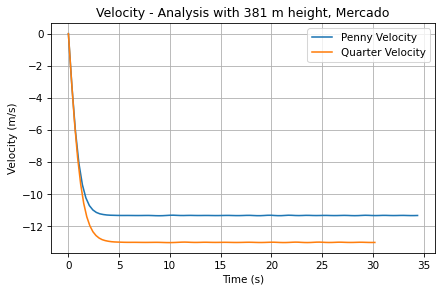

In [27]:
#Velocity - Analysis with 381 m height 
plot_velocity(results_penny_high_ode, results_quarter_high_ode, 'Velocity - Analysis with 381 m height, Mercado')

As a part of our `make_system` function, it was made to calculate it's [terminal velocity](https://www.grc.nasa.gov/www/k-12/VirtualAero/BottleRocket/airplane/termv.html), `v_term`. Let's compare the terminal velocity that was found in our models, and the one that was calculated by `cal_term_vel`:

In [28]:
results_penny_high_sim.v[34.1]

-11.339655582952654

In [29]:
results_penny_high_ode.v

0.000000      0.000000
0.344005     -3.273362
0.688009     -6.045179
1.032014     -8.079614
1.376019     -9.419357
               ...    
33.024446   -11.333738
33.368451   -11.339608
33.712455   -11.344476
34.056460   -11.344098
34.400465   -11.338571
Name: v, Length: 101, dtype: float64

ODE terminal velocity ~11.339

In [30]:
penny_high_sys.v_term

11.339655582952656

As you can see, all the values have a neglible amount of difference, with the simulation model having the greatest accuracy to the `v_term`.

note: `v_term` calculates the magnitutde of velocity, hence the value being > 0 

Now, let's drop coins off of the the **Dreyfuss building**!

<img src="https://www.fdu.edu/wp-content/uploads/2020/04/46722744045_d11a292083_k.jpg" width=300 height=400 align='left' /> 



Text(0, 4, 'Penny at sidewalk')

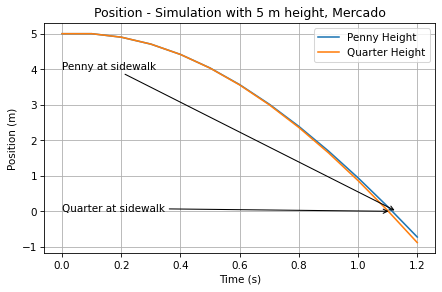

In [31]:
plot_position(results_penny_low_sim, results_quarter_low_sim, 'Position - Simulation with 5 m height, Mercado')
plt.annotate('Quarter at sidewalk', xy=(1.11, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
plt.annotate('Penny at sidewalk', xy=(1.13, 0), xytext=(0, 4), arrowprops=dict(arrowstyle="->"))

Interesting! Both coins hit the ground at nearly the same time. Because the height is significantly lower than the Empire, the difference in time is significantly smaller - meaning that most of the energy produced in the falling object is mostly due to the friction of air, hence the closer proximities to the two. Ignoring the bleeding values past y = 0, we notice that the positin curve never fully straightens out! 

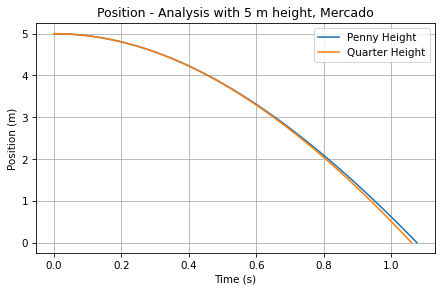

In [32]:
plot_position(results_penny_low_ode, results_quarter_low_ode, 'Position - Analysis with 5 m height, Mercado')

Looks the same! Let's investigate the velocities to see if the coins every reach terminal velocity

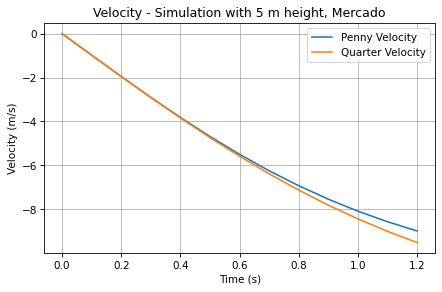

In [33]:
plot_velocity(results_penny_low_sim, results_quarter_low_sim, 'Velocity - Simulation with 5 m height, Mercado')

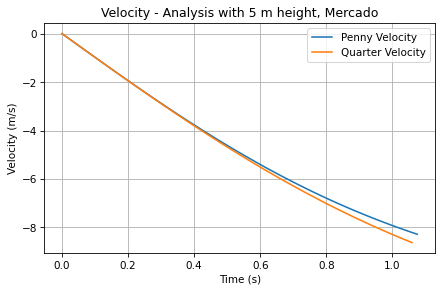

In [34]:
plot_velocity(results_penny_low_ode, results_quarter_low_ode, 'Velocity - Analysis with 5 m height, Mercado')

Above, it is clear that the velocity of the coins never truly reach the terminal velocity as the velocity curve never flattens into a straight line like it did in the previous models with heigh 381 m! Therefore, we can say that a coin does *not* reach terminal velocity at a height of 5 m.

We have seen what it is like to drop coins through the atmosphere, but what if we drop it in water?

# Dropping Coins in Water


<img src="https://gogettercferg.files.wordpress.com/2016/06/giphy2.gif" width=300 height=400 align='left' /> 



Given that our simulations account for the the density of the atmosphere or the medium in which an object is falling through, we can make a rough approxmiate of what it would be like for an object to free fall underwater. Let's initialize our variables:

In [35]:
params_quarter_underwater = Params(height = 381,     # m
                v_init = 0,       # m / s
                g = 9.8,          # m/s**2
                mass = 5.5e-3,    # kg
                diameter = 24.3e-3, # m
                rho = 1000,        # kg/m**2
                t_end = 30,      # seconds 
                C_d = 1.12
               )

show(params_quarter_high)

,value
height,381.0000
v_init,0.0000
g,9.8000
mass,0.0055
diameter,0.0243
rho,1.2250
t_end,30.0000
C_d,1.1200


In [36]:
params_penny_underwater = Params(height = 381,     # m
                v_init = 0,       # m / s
                g = 9.8,          # m/s**2
                mass = 2.5e-3,    # kg
                diameter = 19e-3,
                rho = 1000,        # kg/m**2
                t_end = 30,      # seconds 
                C_d = 1.12
               )

show(params_quarter_high)

,value
height,381.0000
v_init,0.0000
g,9.8000
mass,0.0055
diameter,0.0243
rho,1.2250
t_end,30.0000
C_d,1.1200


`rho` is a *constant*, the density of [water](http://www.sengpielaudio.com/calculator-densityunits.htm#:~:text=Water%20as%20the%20reference%20with,%3D%201000%20kg%2Fm3.). Let's Quickly run our simulations and plot


In [37]:
quarter_underwater = make_system(params_quarter_underwater)
penny_underwater = make_system(params_penny_underwater)

#results_quarter_underwater_sim = run_simulation(quarter_underwater,update_func)

namespace(height=381,
          v_init=0,
          g=9.8,
          mass=0.0025,
          diameter=0.019,
          rho=1000,
          t_end=35,
          C_d=1.12,
          area=0.0002835287369864788,
          init=y    381
               v      0
               Name: state, dtype: int64,
          t_0=0,
          dt=0.1,
          v_term=0.3928171922001215)

Because of the nature of the simulation function, the value of density is actually *too* high for the model, causing an overflow error when utilizing basic float operators. Luckily, our analysis model handles this issue with no problem:

In [38]:
results_penny_ode, details = run_solve_ivp(penny_underwater, slope_func, events=event_func)
results_quarter_ode, details = run_solve_ivp(quarter_underwater, slope_func, events=event_func)
details

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 3386
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fd3c8cae0d0>
   status: 0
  success: True
 t_events: [array([], dtype=float64)]
 y_events: [array([], dtype=float64)]

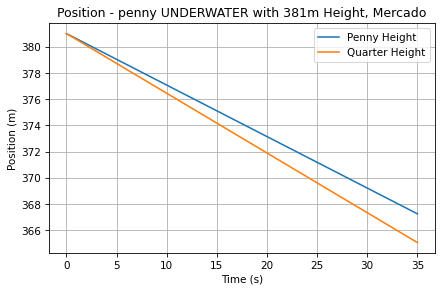

In [39]:
plot_position(results_penny_ode, results_quarter_ode, 'Position - penny UNDERWATER with 381m Height, Mercado')

And the velocities: 

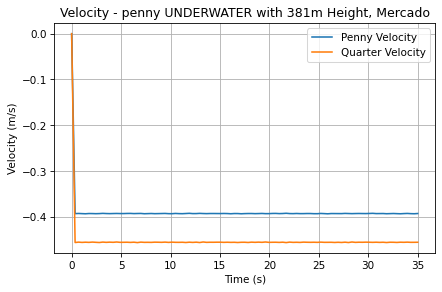

In [40]:
plot_velocity(results_penny_ode, results_quarter_ode, 'Velocity - penny UNDERWATER with 381m Height, Mercado')

What is interesting about the behavior of the two coins in this situation are that they reach terminal velocity nearly instantly when falling through water. With everything we know, this phenomenon is due to the drag foce that is given by the water onto the coin, effectively stabilizing acceleration to 0 after instantaneously deccelerating. This causes a constant velocity of free fall in the water. In this case, it's probably safe to say that these coins won't be hurting anything anytime soon.

Now for fun, let's animate the coin falling in water vs falling in air!

In [41]:
from matplotlib.pyplot import plot

def draw_func(t, state):
    plot(0.5, state.y, 'bo')
    decorate(xlabel='x position (m)',
             ylabel='y position (m)',
             xlim=(0,1),
             ylim=(0,381))

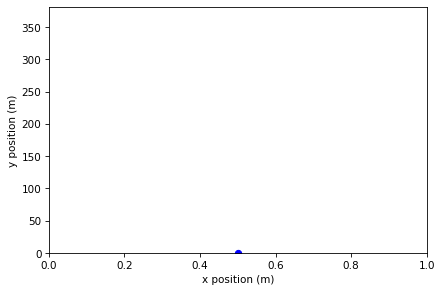

In [42]:
animate(results_quarter_high_ode, draw_func)

In [43]:
def draw_func(t, state):
    plot(0.5, state.y, 'bo')
    decorate(xlabel='x position (m)',
             ylabel='y position (m)',
             xlim=(0,1),
             ylim=(0,381))

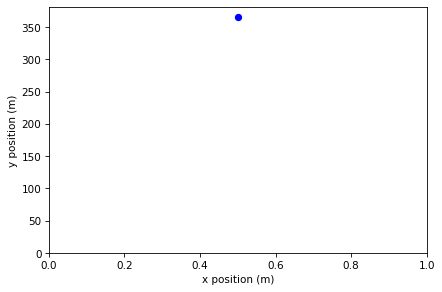

In [44]:
animate(results_quarter_ode, draw_func)

I chose to match the scales of the underwater and regular animation to illustrate how much water reduced the velocity of the quarter compared to the regular in air drop. It barely moves within the water when you compare the two at the same scale!

# Conclusion 
From what we've gathered throughout this project, we found the importance of Coefficient of drag, `C_d`, and the density of the atmosphere, `rho`, is to determining a falling objects terminal velocity - if at any point it does reach it. Terminal Velocity only occurs when friction due to the atmosphere is present. If we were to represent this in a free body diagram, it would look like this:

<img src="https://www.elevise.co.uk/uploads/9/8/0/2/98021560/published/screenshot-2022-01-29-at-10-32-21.png?1643452421" width=200 height=400 align = 'center'/> 

Where the air resistance force vector counteracts the force due to gravity vector, causing the object to reach terminal vecocity. Furthermore, using the principle of forces (Newtons Second Law), we found that objects with a greater mass will have greater terminal velocities due to greater force being produced as a factor of gravity. This will cause the heavier object to also fall in faster time! The greater the density of the atmosphere is, the faster an object reaches terminal velocity!

